## Galaxies in Illustris

Above, we were looking at star particles in simulated galaxies, similar to how we looked at stars in the Milky Way using Gaia data. We can instead look at many galaxies' overall properties, similar to how we looked at galaxies in Galaxy Zoo. We can look at some of the fully evolved galaxies in IllustrisTNG by examining the Illustris_galaxies file in the Data folder.

In [1]:
# read in the data (Illustris_galaxies.csv)
import pandas as pd
data1 = pd.read_csv('../Data/Illustris_galaxies.csv')


In [2]:
# display the data set
data1

,Galaxy ID,Stellar Mass [Mo],g band,r band,Probability is spiral
0,0,3.565573e+12,-23.256830,-24.071047,0.285813
1,1,5.376783e+11,-21.941610,-22.712160,0.817303
2,2,6.034437e+11,-22.199574,-22.951138,0.941455
3,3,1.650696e+11,-21.828701,-22.411537,0.998825
4,4,1.283022e+11,-20.685863,-21.426640,0.113466
...,...,...,...,...,...
12530,704187,5.030724e+09,-17.602875,-18.358276,0.411240
12531,719337,6.327700e+09,-18.095821,-18.824528,0.607696
12532,727485,5.224962e+09,-17.727982,-18.471638,0.475961
12533,738596,3.874592e+09,-17.392363,-18.134193,0.542526


**How many rows are there?** 

**Answer:** 12535

**How many columns are there?** 

**Answer:** 5

**Fill in the rows for each corresponding column**

| Column Header | Definition | Unit |
| :- | :- | :- |
| Galaxy ID |  | 
| Stellar Mass [Mo] | | 
| g band |  | 
| r band |  | 
| Probability is spiral |  | 

In [10]:
# create two boolean arrays for if a galaxy is a spiral galaxy or an elliptical galaxy
# use the same probability cut off that we did with the galaxy zoo
# you can assume a galaxy is elliptical if it is is less than 20% chance a spiral galaxy

# grabbing  probability columns

galaxy_probability = data1["Probability is spiral"]

is_spiral = galaxy_probability >= 0.8
is_elliptical = galaxy_probability < 0.2

# Print the boolean arrays (optional, for checking)
print("Spiral galaxies:\n", is_spiral)
print("Elliptical galaxies:\n", is_elliptical)




Spiral galaxies:
 0        False
1         True
2         True
3         True
4        False
         ...  
12530    False
12531    False
12532    False
12533    False
12534    False
Name: Probability is spiral, Length: 12535, dtype: bool
Elliptical galaxies:
 0        False
1        False
2        False
3        False
4         True
         ...  
12530    False
12531    False
12532    False
12533    False
12534    False
Name: Probability is spiral, Length: 12535, dtype: bool


**What percentage of these galaxies are spirals?**

**Answer:** 

**What percentage of these galaxies are ellipticals?**

**Answer:** 

In [11]:
#fill in the name of the boolean arrays where you see $
print('The percentage of spiral galaxies is', round(sum(is_spiral)/len(is_spiral) * 100,2), '%')
print('The percentage of elliptical galaxies is', round(sum(is_elliptical)/len(is_elliptical) * 100,2), '%')

The percentage of spiral galaxies is 26.18 %
The percentage of elliptical galaxies is 11.76 %


**How do these percentages compare to the ones you found in the Galaxy Zoo data?**

**Answer:** the percentages are close, maybe 2% difference 

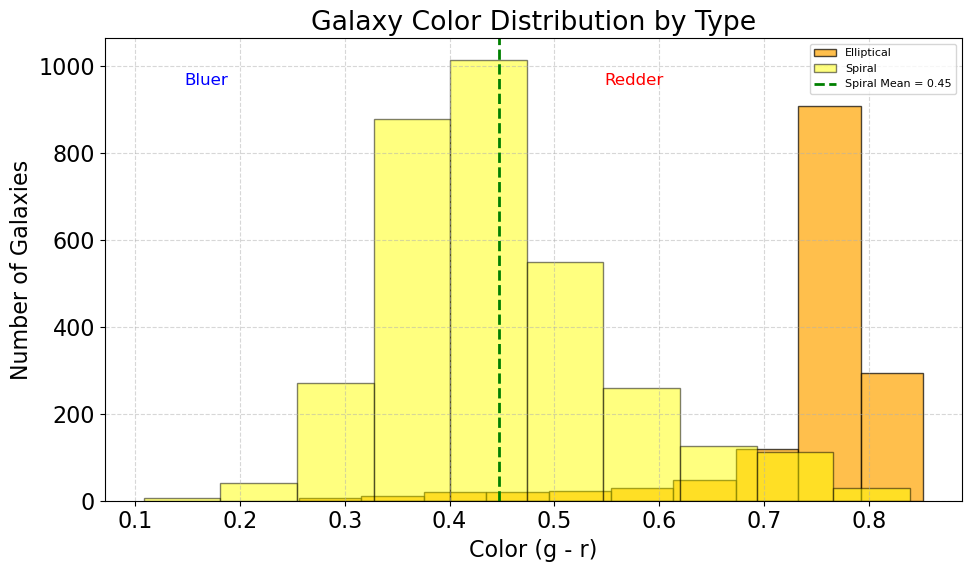

The mean color of spiral galaxies is 0.45
The mean color of elliptical galaxies is 0.75

The standard deviation of the color of spiral galaxies is 0.11
The standard deviation of the color of elliptical galaxies is 0.09


In [12]:
# create a single plot showing histograms of the colors of the two types of galaxies 

# import our graphing package and numpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 



#the below is optional but makes the font a size I can read more easily
import matplotlib
matplotlib.rc('font', **{'family':'sans-serif', 'size':16}) 

# calculate color
# Calculate color for elliptical and spiral galaxies using the mask on the full DataFrame
elliptical_galaxy_color = data1.loc[is_elliptical, "g band"] - data1.loc[is_elliptical, "r band"]
spiral_galaxy_color = data1.loc[is_spiral, "g band"] - data1.loc[is_spiral, "r band"]


# separate into spiral and elliptical


# create one histogram with elliptical and spiral galaxies on it
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(elliptical_galaxy_color, bins=10, color='orange', edgecolor='black', alpha=0.7, label='Elliptical')
plt.hist(spiral_galaxy_color, bins=10, color='yellow', edgecolor='black', alpha=0.5, label='Spiral')
# calculate mean colors
spiral_mean = spiral_galaxy_color.mean()
elliptical_mean = elliptical_galaxy_color.mean()


# mark the spiral mean color
plt.axvline(spiral_mean, color='green', linestyle='dashed', linewidth=2, label=f'Spiral Mean = {spiral_mean:.2f}')

# label red/blue sides
plt.text(spiral_mean - 0.3, plt.ylim()[1]*0.9, 'Bluer', color='blue', fontsize=12)
plt.text(spiral_mean + 0.1, plt.ylim()[1]*0.9, 'Redder', color='red', fontsize=12)


plt.xlabel('Color (g - r)')
plt.ylabel('Number of Galaxies')
plt.title('Galaxy Color Distribution by Type')
plt.legend(fontsize=8, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
# statistics -- find the mean and standard deviations of the color for spirals and ellipticals
# print the stats below


print('The mean color of spiral galaxies is', round(np.mean(spiral_galaxy_color), 2))
print('The mean color of elliptical galaxies is', round(np.mean(elliptical_galaxy_color), 2))
print()
print('The standard deviation of the color of spiral galaxies is', round(np.std(spiral_galaxy_color), 2))
print('The standard deviation of the color of elliptical galaxies is', round(np.std(elliptical_galaxy_color), 2))


**Are your results consistent with what you found in Galaxy Zoo?**

**Answer:** yes 

## Mergers

So far, we have confirmed that in at least some ways, the simulated galaxies behave like observed ones! Cool, but let's learn something new! I said that we can use galaxy simulations to learn about mergers. Let's do that! Read in the mergers files and check out what it contains. 

In [13]:
# read in the file mergers.csv
import pandas as pd
data2 = pd.read_csv('../Data/Illustris_mergers.csv')


In [14]:
# examine the data
data2


,Galaxy ID,Time Since Last Major Merger [Gyr],Number of Major Mergers,Numbber of Minor Mergers
0,11,3.512781,15,16
1,13,8.213934,2,5
2,19,11.317041,4,3
3,21,10.714254,2,3
4,22,12.259335,4,3
...,...,...,...,...
4995,835641,12.259335,2,0
4996,840101,13.800000,0,1
4997,880399,11.317041,1,1
4998,881510,12.804876,2,0


**How many rows are there?** 

**Answer:** 5000

**How many columns are there?**

**Answer:** 4

**Fill in the rows for each corresponding column**

| Column Header | Definition | Unit |
| :- | :- | :- |
| Galaxy ID | galaxy_ID = data2["Galaxy ID"]
 | 
| Time Since Last Major Merger|time_since_last_merger = data2[Time Since Last Major Merger [Gyr]] | 
| Number of Major Mergers | num_maj_mergers = data2[Number of Major Mergers] | 
| Number of Minor Mergers |num_min_mergers = data2[Numbber of Minor Mergers] | 

# Deliverable

Explore the galaxy data you have in this notebook to make at least one plot that tells us something we haven't explored! Be ready to present. You might want to include statistics.

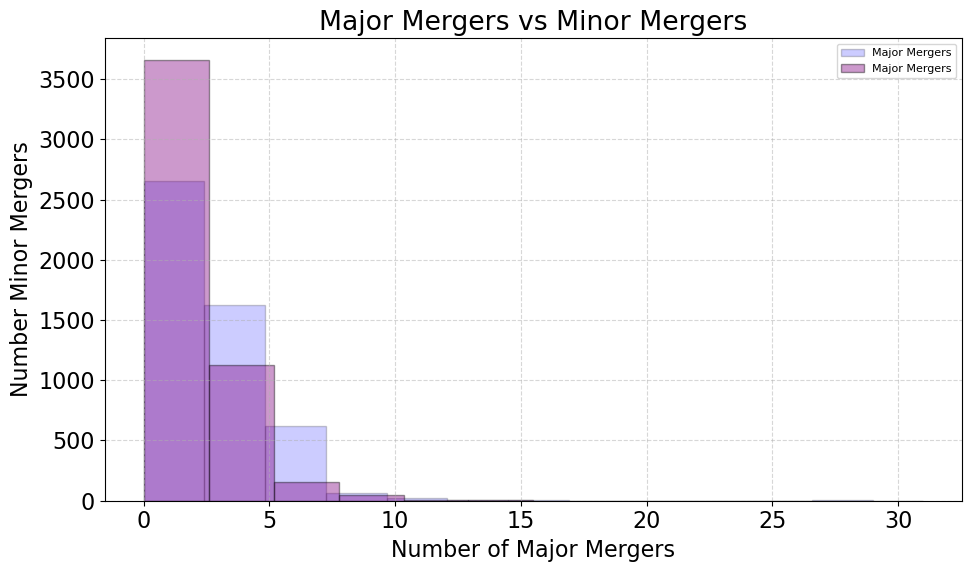

In [35]:
# explore the data and make a plot below!
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

import matplotlib
matplotlib.rc('font', **{'family':'sans-serif', 'size':16}) 

time_since_last_merger = data2['Time Since Last Major Merger [Gyr]']
num_maj_mergers = data2['Number of Major Mergers']
num_min_mergers = data2['Numbber of Minor Mergers']


# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(num_maj_mergers, bins=12, color='Blue', edgecolor='black', alpha=0.2, label='Major Mergers')
plt.hist(num_min_mergers, bins=12, color='Purple', edgecolor='black', alpha=0.4, label='Major Mergers')



plt.xlabel('Number of Major Mergers')
plt.ylabel('Number Minor Mergers')
plt.title('Major Mergers vs Minor Mergers')
plt.legend(fontsize=8, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


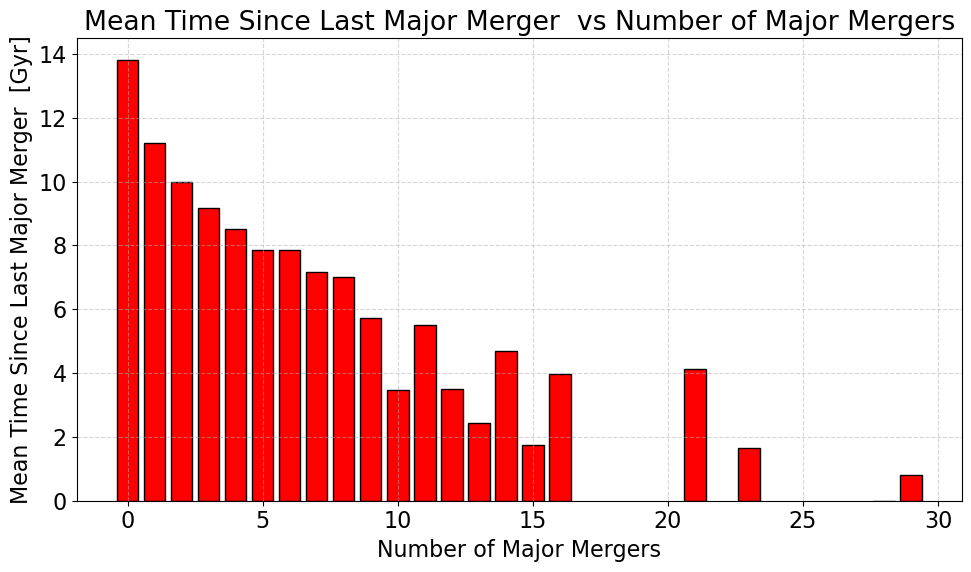

Overall mean time since last major merger: 9.95 Gyr
The standard deviation of the last major merger: 3.45


In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

import matplotlib
matplotlib.rc('font', **{'family':'sans-serif', 'size':16}) 

# Extract columns
time_since_last_merger = data2['Time Since Last Major Merger [Gyr]']
num_maj_mergers = data2['Number of Major Mergers']

# Group by number of major mergers and compute the mean time since last merger
grouped = data2.groupby('Number of Major Mergers')['Time Since Last Major Merger [Gyr]'].mean()

# Plot
plt.figure(figsize=(10, 6))
#plt.plot(grouped.index, grouped.values, marker='o', linestyle='-', color='red', label='Mean Time Since Last Major Merger')
plt.bar(grouped.index, grouped.values, color='red', edgecolor='black')
plt.xlabel('Number of Major Mergers')
plt.ylabel('Mean Time Since Last Major Merger  [Gyr]')
plt.title('Mean Time Since Last Major Merger  vs Number of Major Mergers')
plt.grid(True, linestyle='--', alpha=0.5)
#plt.legend()
plt.tight_layout()
plt.show()

# Optional: print the overall mean
print('Overall mean time since last major merger:', round(time_since_last_merger.mean(), 2), 'Gyr')
print('The standard deviation of the last major merger:', round(np.std(time_since_last_merger), 2))

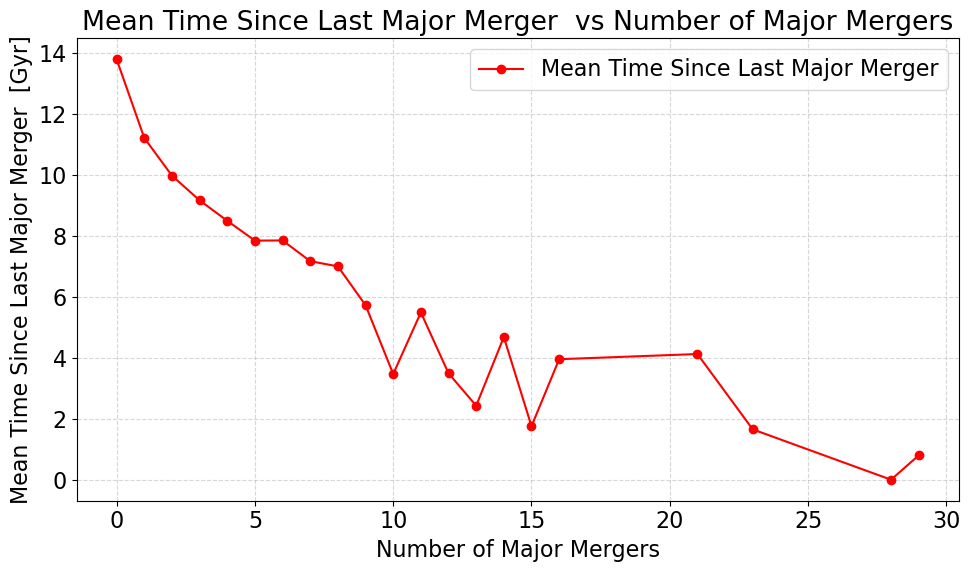

Overall mean time since last major merger: 9.95 Gyr
The standard deviation of the last major merger: 3.45


In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

import matplotlib
matplotlib.rc('font', **{'family':'sans-serif', 'size':16}) 

# Extract columns
time_since_last_merger = data2['Time Since Last Major Merger [Gyr]']
num_maj_mergers = data2['Number of Major Mergers']

# Group by number of major mergers and compute the mean time since last merger
grouped = data2.groupby('Number of Major Mergers')['Time Since Last Major Merger [Gyr]'].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped.values, marker='o', linestyle='-', color='red', label='Mean Time Since Last Major Merger')
#plt.bar(grouped.index, grouped.values, color='red', edgecolor='black')
plt.xlabel('Number of Major Mergers')
plt.ylabel('Mean Time Since Last Major Merger  [Gyr]')
plt.title('Mean Time Since Last Major Merger  vs Number of Major Mergers')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: print the overall mean
print('Overall mean time since last major merger:', round(time_since_last_merger.mean(), 2), 'Gyr')
print('The standard deviation of the last major merger:', round(np.std(time_since_last_merger), 2))

**According to your graph set up...**

**What is the independent variable?**

**Answer:** Number of Major Mergers 


**What is the dependent variable: Mean time since last major merjer 


**What could a control variable be?**

**Answer:** maybe mass or type spiral or elliptical 

**What shapes or trends do you see in the data?**

**Answer:** A decreasing trend, where galaxies with more major mergers tend to have more recent last mergers (lower Gyr). A decreasing trend, where galaxies with more major mergers tend to have more recent last mergers (lower mean time since last merger in Gyr).

**What could this mean physically/astronomically?**

**Answer:** galaxies are going through more mergers and more frequently

**What further questions does this raise?**

**Answer:** How do minor mergers influence this trend?

Do galaxy properties like morphology or star formation correlate with merger history?

How does environment affect the frequency and timing of mergers?

## Reflection

Write down some notes in your lab notebook about what you've learned in this unit about simulated galaxies. Be sure to include some astronomy and some coding. 